In [1]:
import os
import sys

# Set Spark home
os.environ['SPARK_HOME'] = 'C:\\spark\\spark-3.5.6-bin-hadoop3'

# Add PySpark to Python path
sys.path.insert(0, os.path.join(os.environ['SPARK_HOME'], 'python'))
sys.path.insert(0, os.path.join(os.environ['SPARK_HOME'], 'python\\lib\\py4j-0.10.9.7-src.zip'))

# Initialize Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("JupyterSpark") \
    .getOrCreate()

sc = spark.sparkContext

print("Spark ready!")

Spark ready!


In [2]:
# ipl_pyspark_analysis.py

import os
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import *



In [3]:
# -----------------------------------------
# 🚀 1. Initialize Spark
# -----------------------------------------
spark = SparkSession.builder.appName("IPL2022 Analysis").getOrCreate()



In [4]:
# -----------------------------------------
# 🚀 2. Load Dataset (via pandas → Spark)
# -----------------------------------------
input_path = "ipl2022.csv"

try:
    pandas_df = pd.read_csv(input_path)
    df = spark.createDataFrame(pandas_df)
    print("✅ IPL dataset loaded successfully!\n")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    spark.stop()
    raise

df.printSchema()
df.show(5)


✅ IPL dataset loaded successfully!

root
 |-- ID: long (nullable = true)
 |-- innings: long (nullable = true)
 |-- overs: long (nullable = true)
 |-- ballnumber: long (nullable = true)
 |-- batter: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- non-striker: string (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- batsman_run: long (nullable = true)
 |-- extras_run: long (nullable = true)
 |-- total_run: long (nullable = true)
 |-- non_boundary: long (nullable = true)
 |-- isWicketDelivery: long (nullable = true)
 |-- player_out: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- fielders_involved: string (nullable = true)
 |-- BattingTeam: string (nullable = true)

+-------+-------+-----+----------+-----------+--------------+-----------+----------+-----------+----------+---------+------------+----------------+----------+----+-----------------+----------------+
|     ID|innings|overs|ballnumber|     batter|        bowler|non-striker|ext

In [12]:
print(f"Total deliveries: {df.count()}")
print(f"Total columns: {len(df.columns)}\n")

Py4JJavaError: An error occurred while calling o49.count.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:750)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2702)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.$anonfun$apply$1(CoalesceShufflePartitions.scala:61)
	at scala.runtime.java8.JFunction0$mcI$sp.apply(JFunction0$mcI$sp.java:23)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:58)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:34)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$optimizeQueryStage$2(AdaptiveSparkPlanExec.scala:169)
	at scala.collection.LinearSeqOptimized.foldLeft(LinearSeqOptimized.scala:126)
	at scala.collection.LinearSeqOptimized.foldLeft$(LinearSeqOptimized.scala:122)
	at scala.collection.immutable.List.foldLeft(List.scala:91)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.optimizeQueryStage(AdaptiveSparkPlanExec.scala:168)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.newQueryStage(AdaptiveSparkPlanExec.scala:591)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:540)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$createQueryStages$2(AdaptiveSparkPlanExec.scala:580)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.AbstractTraversable.map(Traversable.scala:108)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:580)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:277)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:272)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:419)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:392)
	at org.apache.spark.sql.Dataset.$anonfun$count$1(Dataset.scala:3616)
	at org.apache.spark.sql.Dataset.$anonfun$count$1$adapted(Dataset.scala:3615)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.count(Dataset.scala:3615)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


🔥 TOP 10 BATTERS:
+------------+----------+-----------+
|batter      |total_runs|balls_faced|
+------------+----------+-----------+
|JC Buttler  |863       |596        |
|KL Rahul    |616       |472        |
|Q de Kock   |508       |350        |
|HH Pandya   |487       |387        |
|Shubman Gill|483       |374        |
|DA Miller   |481       |348        |
|F du Plessis|468       |377        |
|S Dhawan    |460       |395        |
|SV Samson   |458       |321        |
|DJ Hooda    |451       |340        |
+------------+----------+-----------+



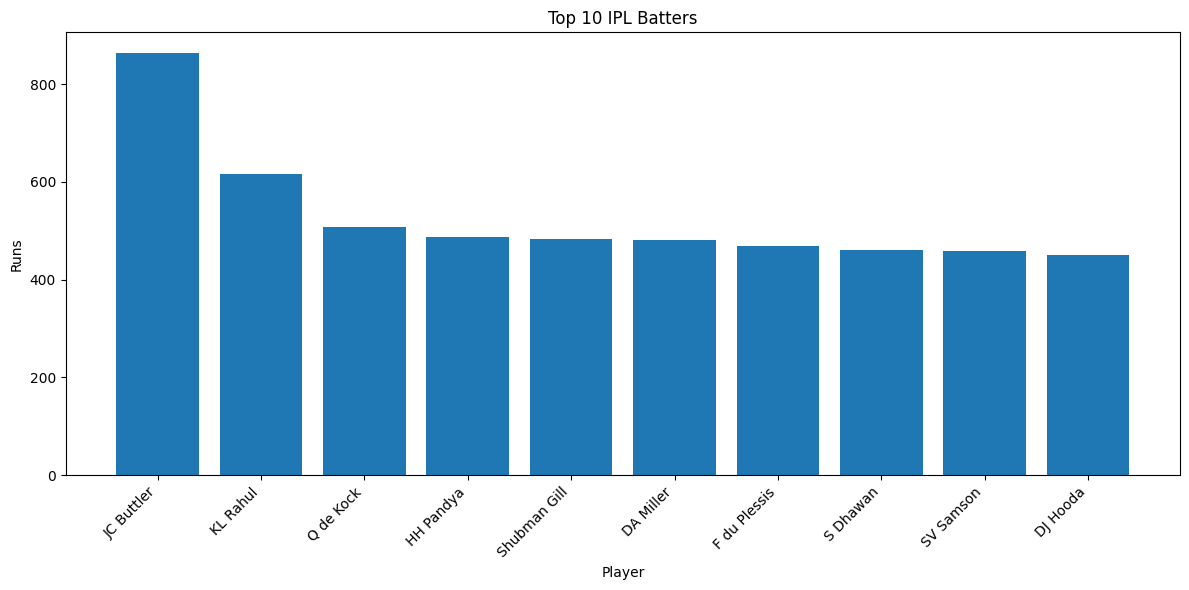

In [6]:
# -----------------------------------------
# 1️⃣ TOP 10 BATTERS
# -----------------------------------------
print("🔥 TOP 10 BATTERS:")

top_batters = df.groupBy("batter") \
    .agg(
        sum("batsman_run").alias("total_runs"),
        count("*").alias("balls_faced")
    ) \
    .orderBy(desc("total_runs")) \
    .limit(10)

top_batters.show(truncate=False)

# Plot
batters_pd = top_batters.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(batters_pd['batter'], batters_pd['total_runs'])
plt.xticks(rotation=45, ha="right")
plt.title('Top 10 IPL Batters')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.tight_layout()
plt.show()




🎯 TOP 10 BOWLERS:
+-----------------+-------+
|bowler           |wickets|
+-----------------+-------+
|YS Chahal        |29     |
|PWH de Silva     |27     |
|K Rabada         |23     |
|Umran Malik      |23     |
|M Prasidh Krishna|21     |
|HV Patel         |21     |
|Mohammed Shami   |21     |
|Kuldeep Yadav    |21     |
|JR Hazlewood     |21     |
|AD Russell       |21     |
+-----------------+-------+



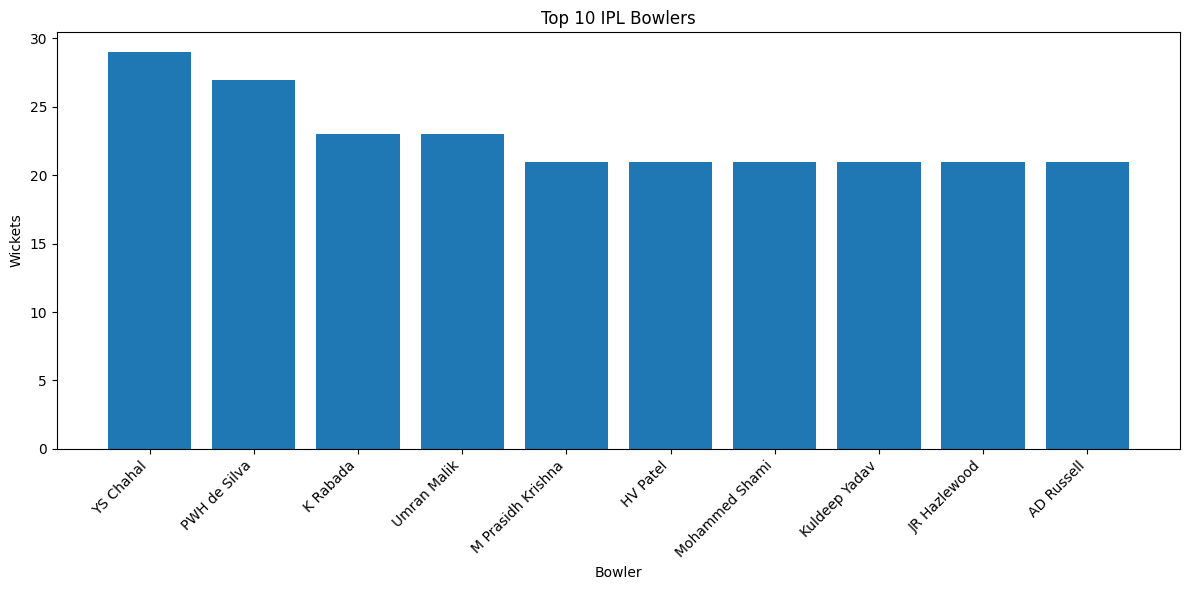

In [7]:
# -----------------------------------------
# 2️⃣ TOP 10 BOWLERS
# -----------------------------------------
print("\n🎯 TOP 10 BOWLERS:")

if "isWicketDelivery" in df.columns:
    top_bowlers = df.filter(col("isWicketDelivery") == 1) \
        .groupBy("bowler") \
        .agg(count("*").alias("wickets")) \
        .orderBy(desc("wickets")) \
        .limit(10)
    
    top_bowlers.show(truncate=False)

    # Plot
    bowlers_pd = top_bowlers.toPandas()
    plt.figure(figsize=(12, 6))
    plt.bar(bowlers_pd['bowler'], bowlers_pd['wickets'])
    plt.xticks(rotation=45, ha="right")
    plt.title('Top 10 IPL Bowlers')
    plt.xlabel('Bowler')
    plt.ylabel('Wickets')
    plt.tight_layout()
    plt.show()




🏏 TEAM BATTING PERFORMANCE:
+---------------------------+----------+------------+
|BattingTeam                |total_runs|balls_bowled|
+---------------------------+----------+------------+
|Rajasthan Royals           |2943      |2107        |
|Gujarat Titans             |2663      |1971        |
|Royal Challengers Bangalore|2632      |1965        |
|Lucknow Super Giants       |2548      |1840        |
|Punjab Kings               |2343      |1712        |
|Delhi Capitals             |2341      |1650        |
|Chennai Super Kings        |2288      |1719        |
|Kolkata Knight Riders      |2223      |1634        |
|Mumbai Indians             |2217      |1691        |
|Sunrisers Hyderabad        |2197      |1623        |
+---------------------------+----------+------------+



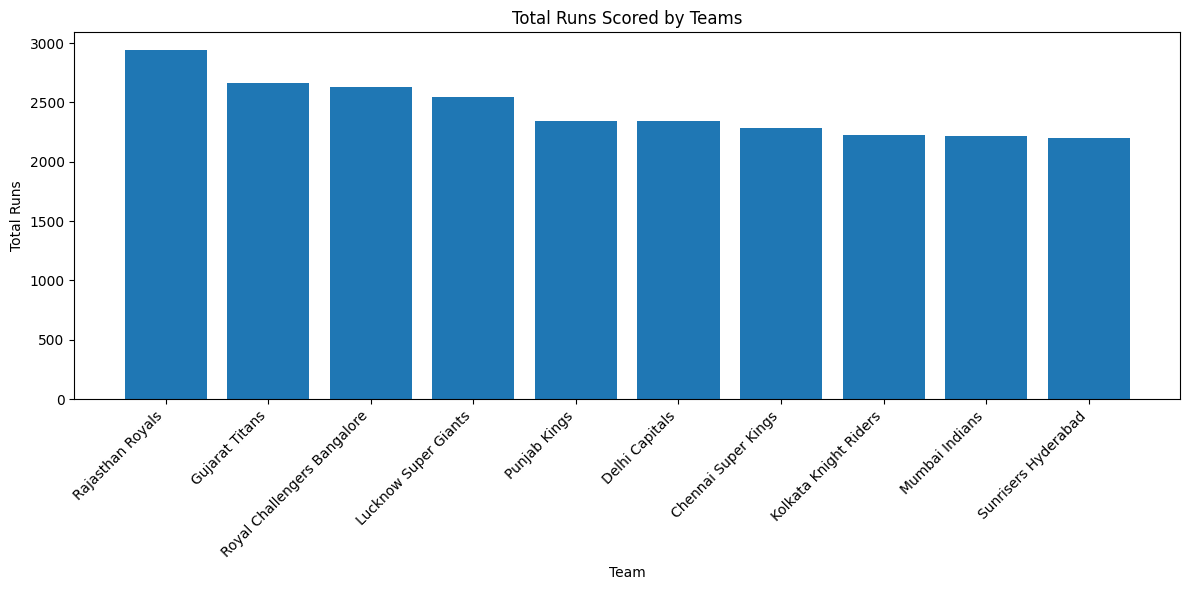

In [8]:
# -----------------------------------------
# 3️⃣ TEAM BATTING PERFORMANCE
# -----------------------------------------
print("\n🏏 TEAM BATTING PERFORMANCE:")

if "BattingTeam" in df.columns:
    team_batting = df.groupBy("BattingTeam") \
        .agg(
            sum("total_run").alias("total_runs"),
            count("*").alias("balls_bowled")
        ) \
        .orderBy(desc("total_runs"))

    team_batting.show(truncate=False)

    # Plot
    team_pd = team_batting.toPandas()
    plt.figure(figsize=(12, 6))
    plt.bar(team_pd['BattingTeam'], team_pd['total_runs'])
    plt.xticks(rotation=45, ha="right")
    plt.title('Total Runs Scored by Teams')
    plt.xlabel('Team')
    plt.ylabel('Total Runs')
    plt.tight_layout()
    plt.show()




📈 DISMISSAL TYPES:
+-----------------+-----+
|kind             |count|
+-----------------+-----+
|caught           |625  |
|bowled           |123  |
|run out          |61   |
|lbw              |57   |
|caught and bowled|25   |
|stumped          |18   |
|hit wicket       |1    |
|retired out      |1    |
|retired hurt     |1    |
+-----------------+-----+



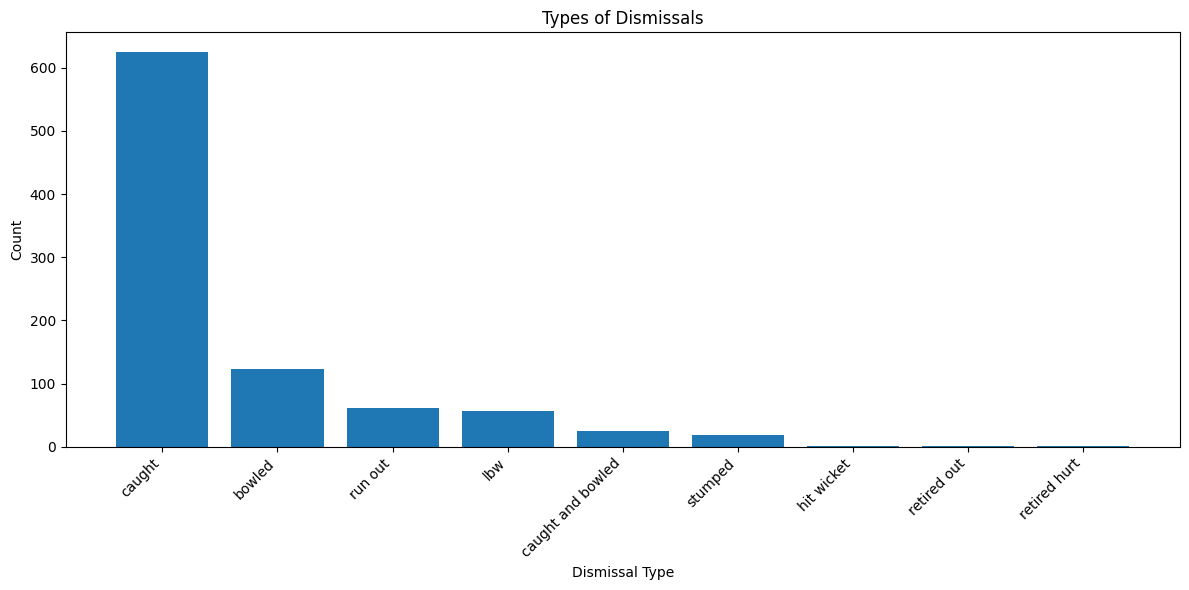

In [9]:
# -----------------------------------------
# 4️⃣ DISMISSAL TYPES
# -----------------------------------------
print("\n📈 DISMISSAL TYPES:")

if "kind" in df.columns:
    dismissals = df.filter(col("isWicketDelivery") == 1) \
        .groupBy("kind") \
        .agg(count("*").alias("count")) \
        .orderBy(desc("count"))

    dismissals.show(truncate=False)

    # Plot
    diss_pd = dismissals.toPandas()
    plt.figure(figsize=(12, 6))
    plt.bar(diss_pd['kind'], diss_pd['count'])
    plt.xticks(rotation=45, ha="right")
    plt.title('Types of Dismissals')
    plt.xlabel('Dismissal Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()




In [10]:
# -----------------------------------------
# 🚀 DONE
# -----------------------------------------
print("✅ Analysis Complete!")
spark.stop()

✅ Analysis Complete!
